# Import libraries

In [975]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sms
import warnings

warnings.simplefilter(action='ignore')
%matplotlib inline

# Uploading datasets

In [976]:
df_bonds_gov = pd.read_csv('data-sets/объем_рынка_государственных_облигаций_россия,_rub_1_2003_2023.csv', sep=';')
df_bonds_corp = pd.read_csv('data-sets/объем_рынка_корпоративных_облигаций_россия,_rub_1_2003_2023.csv', sep=';')

In [977]:
df_bonds_gov

,Дата,"Объем рынка государственных облигаций - Россия, RUB"
0,30.09.2023,"19 733,15"
1,31.08.2023,"19 696,33"
2,31.07.2023,"19 877,20"
3,30.06.2023,"19 522,00"
4,31.05.2023,"19 217,86"
...,...,...
234,31.03.2004,"705,12"
235,27.02.2004,"685,55"
236,30.01.2004,"671,61"
237,31.12.2003,"663,53"


In [978]:
df_bonds_corp

,Дата,"Объем рынка корпоративных облигаций - Россия, RUB"
0,31.10.2023,"23 434,04"
1,30.09.2023,"23 368,51"
2,31.08.2023,"22 966,58"
3,31.07.2023,"22 741,20"
4,30.06.2023,"21 943,25"
...,...,...
239,27.02.2004,"180,37"
240,31.01.2004,"160,88"
241,30.01.2004,"159,41"
242,31.12.2003,"159,51"


In [979]:
df_indicators = pd.read_csv('data-sets/Global Economy Indicators.csv')
df_indicators

,CountryID,Country,Year,AMA exchange rate,IMF based exchange rate,Population,Currency,Per capita GNI,"Agriculture, hunting, forestry, fishing (ISIC A-B)",Changes in inventories,...,Household consumption expenditure (including Non-profit institutions serving households),Imports of goods and services,Manufacturing (ISIC D),"Mining, Manufacturing, Utilities (ISIC C-E)",Other Activities (ISIC J-P),Total Value Added,"Transport, storage and communication (ISIC I)","Wholesale, retail trade, restaurants and hotels (ISIC G-H)",Gross National Income(GNI) in USD,Gross Domestic Product (GDP)
0,4,Afghanistan,1970,0.044998,0.044998,10752971,Afghani,164,8.699174e+08,NaN,...,1.551094e+09,1.952772e+08,3.701468e+08,3.766908e+08,1.277478e+08,1.731454e+09,8.391720e+07,2.263871e+08,1.766528e+09,1.731436e+09
1,4,Afghanistan,1971,0.044998,0.044998,11015857,Afghani,168,9.108281e+08,NaN,...,1.675426e+09,2.762965e+08,3.875495e+08,3.944012e+08,1.337541e+08,1.812857e+09,8.786038e+07,2.370192e+08,1.850122e+09,1.812838e+09
2,4,Afghanistan,1972,0.044998,0.044998,11286753,Afghani,149,8.279453e+08,NaN,...,1.498812e+09,2.903704e+08,3.522847e+08,3.585129e+08,1.215827e+08,1.647918e+09,7.986452e+07,2.154773e+08,1.683948e+09,1.647900e+09
3,4,Afghanistan,1973,0.044998,0.044998,11575305,Afghani,150,8.554869e+08,NaN,...,1.508024e+09,2.629629e+08,3.640103e+08,3.704458e+08,1.256302e+08,1.702735e+09,8.252888e+07,2.226243e+08,1.739998e+09,1.702716e+09
4,4,Afghanistan,1974,0.044998,0.044998,11869879,Afghani,177,1.035913e+09,NaN,...,1.778819e+09,3.056792e+08,4.407604e+08,4.485528e+08,1.521192e+08,2.061752e+09,9.991860e+07,2.695259e+08,2.106420e+09,2.061729e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10507,894,Zambia,2017,9.519501,9.519501,17298054,Kwacha,1448,1.041005e+09,567729313.0,...,1.215309e+10,9.465895e+09,2.102369e+09,7.194153e+09,6.187124e+09,2.416662e+10,1.965026e+09,5.323590e+09,2.505604e+10,2.586816e+10
10508,894,Zambia,2018,10.458143,10.458143,17835893,Kwacha,1451,8.791160e+08,929063411.0,...,1.183200e+10,9.717269e+09,1.801783e+09,6.556884e+09,5.791375e+09,2.422570e+10,2.490720e+09,5.990720e+09,2.588455e+10,2.631198e+10
10509,894,Zambia,2019,12.889418,12.889418,18380477,Kwacha,1246,6.668385e+08,817104395.0,...,9.848112e+09,7.961415e+09,1.582484e+09,5.584425e+09,5.231062e+09,2.153971e+10,2.537646e+09,4.959277e+09,2.291011e+10,2.331036e+10
10510,894,Zambia,2020,18.344093,18.344093,18927715,Kwacha,928,5.391694e+08,439295787.0,...,6.969267e+09,5.892353e+09,1.397303e+09,4.269405e+09,4.217431e+09,1.718020e+10,2.258715e+09,3.234123e+09,1.756233e+10,1.811064e+10


# Preparing data for analysis

## Selecting the necessary columns

In [980]:
df_indicators.columns = df_indicators.columns.str.strip()
df_indicators = df_indicators[['Country', 'Year', 'Per capita GNI', 'General government final consumption expenditure', 'Gross capital formation', 'Gross National Income(GNI) in USD', 'Gross Domestic Product (GDP)']]
df_indicators

,Country,Year,Per capita GNI,General government final consumption expenditure,Gross capital formation,Gross National Income(GNI) in USD,Gross Domestic Product (GDP)
0,Afghanistan,1970,164,1.121270e+08,9.461182e+07,1.766528e+09,1.731436e+09
1,Afghanistan,1971,168,1.211148e+08,9.901235e+07,1.850122e+09,1.812838e+09
2,Afghanistan,1972,149,1.083475e+08,1.034568e+08,1.683948e+09,1.647900e+09
3,Afghanistan,1973,150,1.090135e+08,1.217284e+08,1.739998e+09,1.702716e+09
4,Afghanistan,1974,177,1.285890e+08,1.750619e+08,2.106420e+09,2.061729e+09
...,...,...,...,...,...,...,...
10507,Zambia,2017,1448,3.549314e+09,1.060675e+10,2.505604e+10,2.586816e+10
10508,Zambia,2018,1451,3.343899e+09,1.016724e+10,2.588455e+10,2.631198e+10
10509,Zambia,2019,1246,4.122149e+09,9.151849e+09,2.291011e+10,2.331036e+10
10510,Zambia,2020,928,2.664373e+09,5.848494e+09,1.756233e+10,1.811064e+10


## Renaming the columns

In [981]:
df_bonds_corp = df_bonds_corp.rename(columns={'Дата': 'date', 'Объем рынка корпоративных облигаций - Россия, RUB': 'volume'})
df_bonds_gov = df_bonds_gov.rename(columns={'Дата': 'date', 'Объем рынка государственных облигаций - Россия, RUB': 'volume'})

## Check the values for missing

In [982]:
df_bonds_corp.isna().sum()

date      0
volume    0
dtype: int64

In [983]:
df_bonds_gov.isna().sum()

date      0
volume    0
dtype: int64

It's okay

In [984]:
df_indicators.isna().sum()

Country                                              0
Year                                                 0
Per capita GNI                                       0
General government final consumption expenditure    52
Gross capital formation                             52
Gross National Income(GNI) in USD                    0
Gross Domestic Product (GDP)                         0
dtype: int64

We can see missing values. To begin with, let's select only Russia and the years we need

In [985]:
df_indicators['Country'] = df_indicators['Country'].str.strip()
df_indicators_russia = df_indicators[(df_indicators['Year'] >= 1990) & (df_indicators['Country'] == 'Russian Federation')]
df_indicators_russia.head()

,Country,Year,Per capita GNI,General government final consumption expenditure,Gross capital formation,Gross National Income(GNI) in USD,Gross Domestic Product (GDP)
7874,Russian Federation,1990,3870,1.140000e+11,1.840000e+11,5.730000e+11,5.740000e+11
7875,Russian Federation,1991,3789,8.918929e+10,2.170000e+11,5.630000e+11,5.640000e+11
7876,Russian Federation,1992,3241,6.546205e+10,1.810000e+11,4.820000e+11,4.930000e+11
7877,Russian Federation,1993,3040,7.660634e+10,1.320000e+11,4.530000e+11,4.610000e+11
7878,Russian Federation,1994,2730,8.810287e+10,1.110000e+11,4.060000e+11,4.110000e+11


In [986]:
df_indicators_russia.isna().sum()

Country                                             0
Year                                                0
Per capita GNI                                      0
General government final consumption expenditure    0
Gross capital formation                             0
Gross National Income(GNI) in USD                   0
Gross Domestic Product (GDP)                        0
dtype: int64

Now there's no more missing values

## Check the data types

In [987]:
df_bonds_corp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    244 non-null    object
 1   volume  244 non-null    object
dtypes: object(2)
memory usage: 3.9+ KB


In [988]:
df_bonds_gov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    239 non-null    object
 1   volume  239 non-null    object
dtypes: object(2)
memory usage: 3.9+ KB


As we can see, there are wrong data types. Let's fix this

In [989]:
df_bonds_corp['date'] = pd.to_datetime(df_bonds_corp['date'])
df_bonds_corp['year'] = df_bonds_corp['date'].dt.year
df_bonds_corp['volume'] = df_bonds_corp['volume'].str.replace(',', '.').str.replace(' ', '').astype('float64')

df_bonds_gov['date'] = pd.to_datetime(df_bonds_gov['date'])
df_bonds_gov['year'] = df_bonds_gov['date'].dt.year
df_bonds_gov['volume'] = df_bonds_gov['volume'].str.replace(',', '.').str.replace(' ', '').astype('float64')

In [990]:
df_bonds_corp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    244 non-null    datetime64[ns]
 1   volume  244 non-null    float64       
 2   year    244 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 5.8 KB


In [991]:
df_bonds_gov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    239 non-null    datetime64[ns]
 1   volume  239 non-null    float64       
 2   year    239 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 5.7 KB


It's done

In [992]:
df_indicators_russia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 7874 to 7905
Data columns (total 7 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Country                                           32 non-null     object 
 1   Year                                              32 non-null     int64  
 2   Per capita GNI                                    32 non-null     int64  
 3   General government final consumption expenditure  32 non-null     float64
 4   Gross capital formation                           32 non-null     float64
 5   Gross National Income(GNI) in USD                 32 non-null     float64
 6   Gross Domestic Product (GDP)                      32 non-null     float64
dtypes: float64(4), int64(2), object(1)
memory usage: 2.0+ KB


It's all right here

# Analysis

## GDP by year

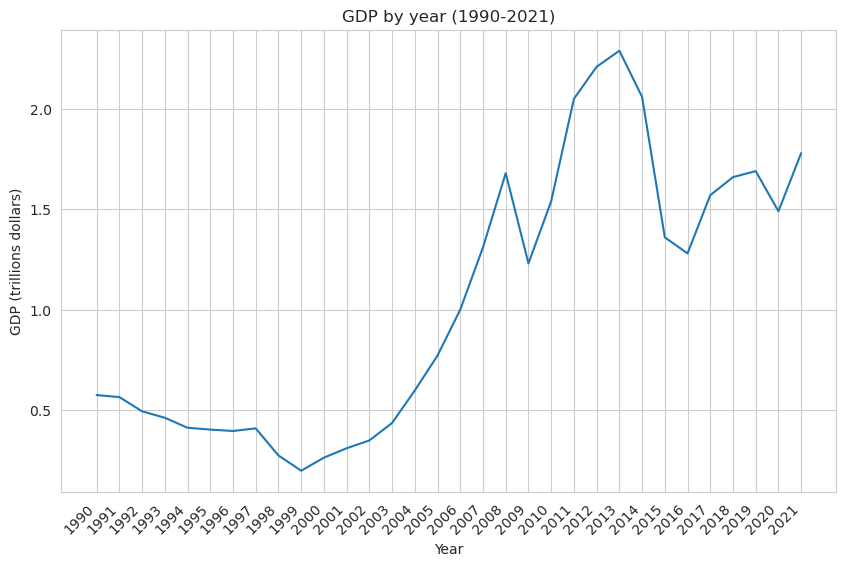

In [993]:
indicators_gdp = df_indicators_russia[['Year', 'Gross Domestic Product (GDP)']]
indicators_gdp['Gross Domestic Product (GDP)'] = indicators_gdp['Gross Domestic Product (GDP)'] / 10**12

sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.lineplot(data=indicators_gdp, x='Year', y='Gross Domestic Product (GDP)')
plt.xticks(df_indicators_russia['Year'], rotation=45, ha='right')
plt.ylabel('GDP (trillions dollars)')
plt.title('GDP by year (1990-2021)')

plt.show()

## Change of indicators by year

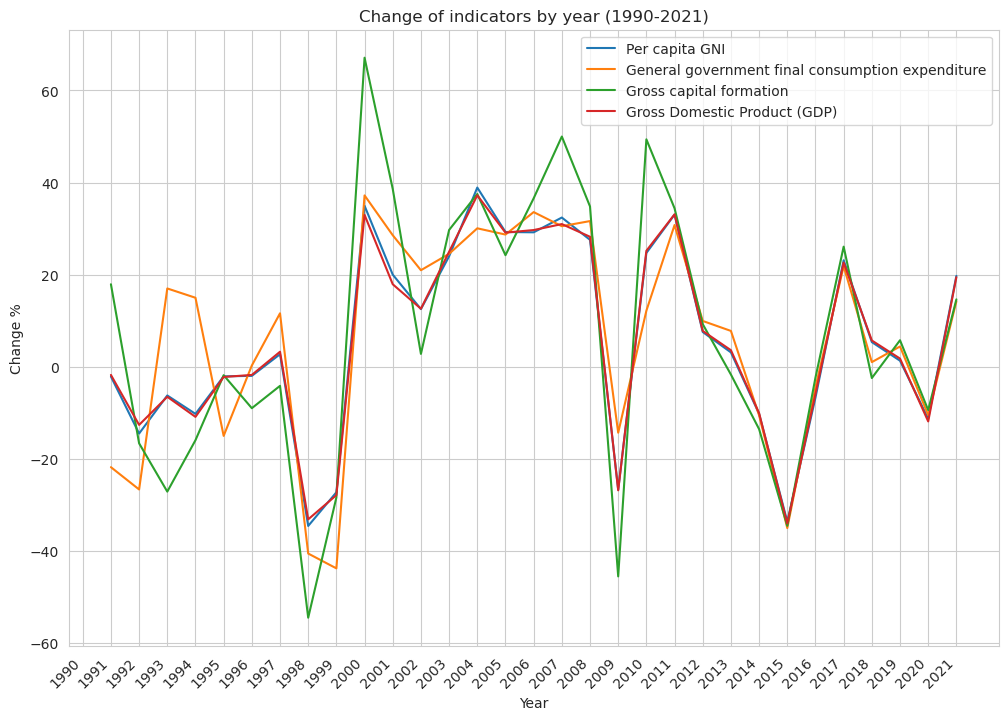

In [994]:
indicators_change = df_indicators_russia.iloc[:, 2:].pct_change()*100
indicators_change['Year'] = df_indicators['Year']
indicators_change

plt.figure(figsize=(12, 8))
for col in indicators_change[['Per capita GNI', 'General government final consumption expenditure', 'Gross capital formation', 'Gross Domestic Product (GDP)']]:
    sns.lineplot(data=indicators_change, x='Year', y=col, label=col)

plt.ylabel('Change %')
plt.xticks(indicators_change['Year'], rotation=45, ha='right')
plt.title('Change of indicators by year (1990-2021)')
plt.legend()

plt.show()

## Volume of corporate and government bonds

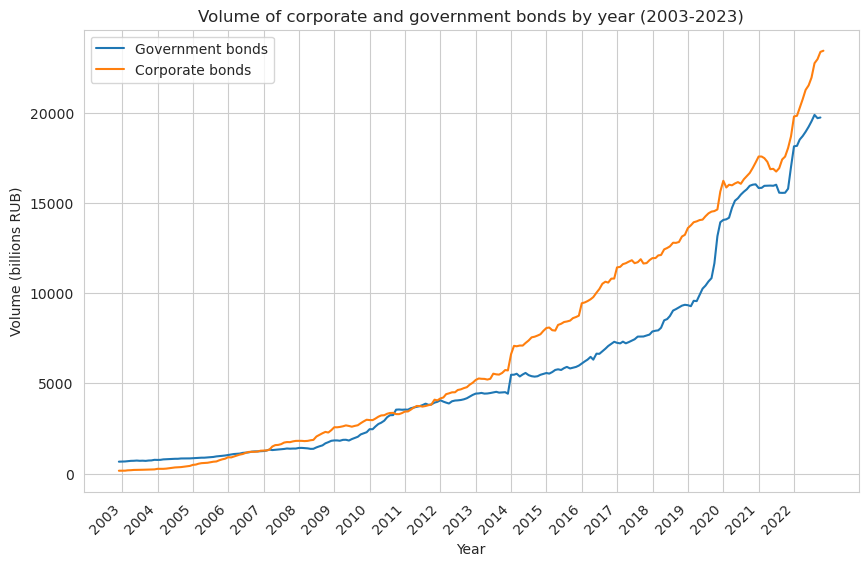

In [995]:
start_date = df_bonds_gov['date'].min()
end_date = df_bonds_gov['date'].max()
date_range = pd.date_range(start=start_date, end=end_date, freq='Y', closed='right')


plt.figure(figsize=(10, 6))
sns.lineplot(data=df_bonds_gov, x='date', y='volume', label='Government bonds')
sns.lineplot(data=df_bonds_corp, x='date', y='volume', label='Corporate bonds')

plt.xticks(date_range, [date.year for date in date_range], rotation=45, ha='right')
plt.title('Volume of corporate and government bonds by year (2003-2023)')
plt.xlabel('Year')
plt.ylabel('Volume (billions RUB)')
plt.show()

The volume of corporate bonds is higher than the volume of government bonds in almost all years

## Percentage change in the volume of corporate and government bonds

In [996]:
df_bonds_corp['volume_change'] = df_bonds_corp['volume'].pct_change()*100
df_bonds_gov['volume_change'] = df_bonds_gov['volume'].pct_change()*100

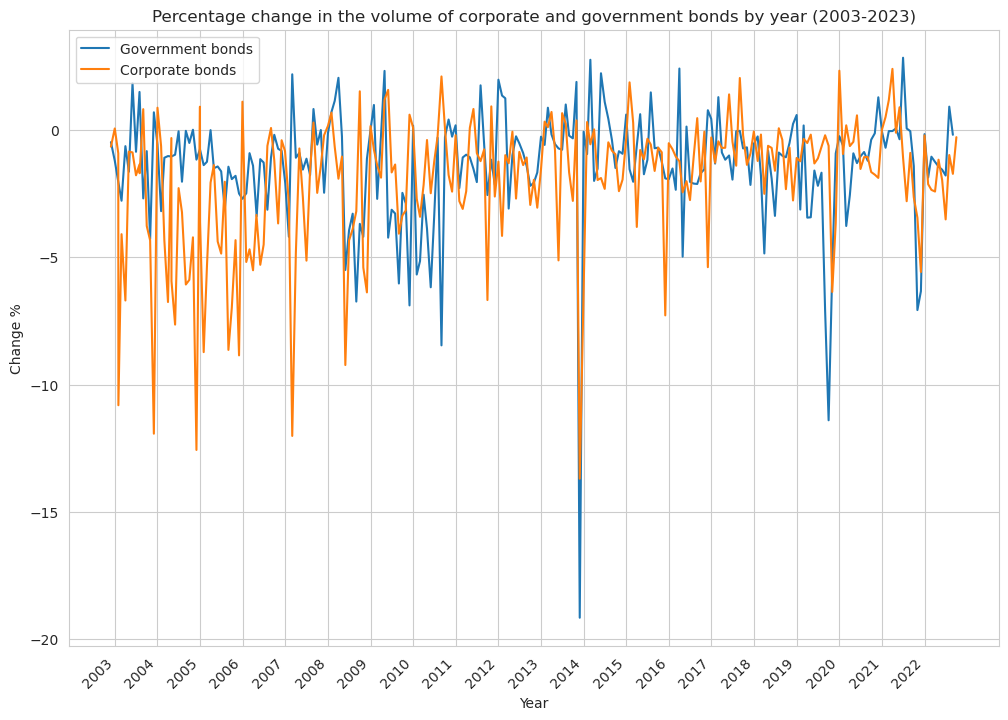

In [997]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_bonds_gov, x='date', y='volume_change', label='Government bonds')
sns.lineplot(data=df_bonds_corp, x='date', y='volume_change', label='Corporate bonds')

plt.xticks(date_range, [date.year for date in date_range], rotation=45, ha='right')
plt.title('Percentage change in the volume of corporate and government bonds by year (2003-2023)')
plt.xlabel('Year')
plt.ylabel('Change %')
plt.show()

The graph shows that from 2003 to 2008 the decline in the volume of corporate bonds exceeded the decline in the volume of government bonds.

## Total volume of bonds by year

In [998]:
year_bonds_corp = df_bonds_corp.groupby('year').max('date').reset_index()[['year', 'volume']]
year_bonds_gov = df_bonds_gov.groupby('year').max('date').reset_index()[['year', 'volume']]
year_bonds_corp['volume_change'] = year_bonds_corp['volume'].pct_change()*100
year_bonds_gov['volume_change'] = year_bonds_gov['volume'].pct_change()*100

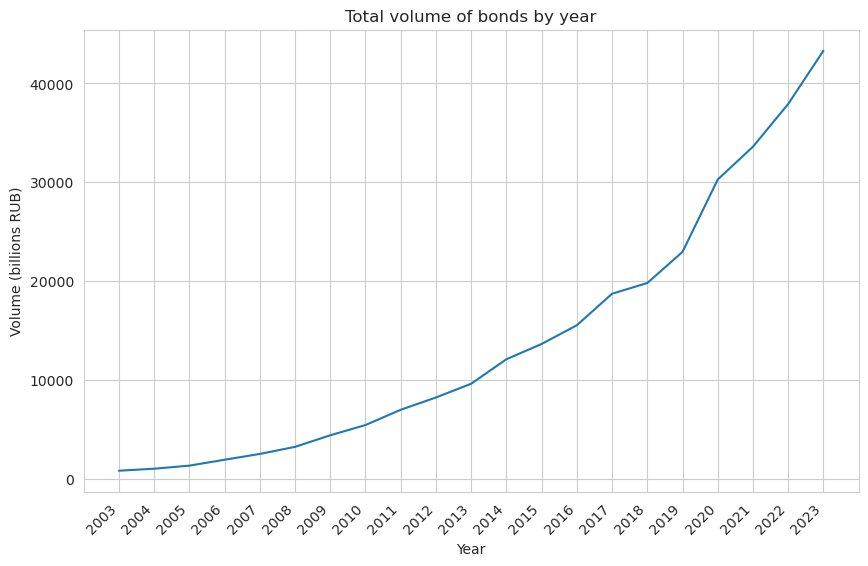

In [999]:
bonds_summary = year_bonds_corp[['volume']] + year_bonds_gov[['volume']]
bonds_summary['year'] = year_bonds_corp['year']

plt.figure(figsize=(10, 6))
sns.lineplot(data=bonds_summary, x='year', y='volume')

plt.xticks(bonds_summary['year'], rotation=45, ha='right')
plt.title('Total volume of bonds by year')
plt.xlabel('Year')
plt.ylabel('Volume (billions RUB)')
plt.show()

## Percentage change in GDP and bonds separately

In [1000]:
indicators_gdp = df_indicators_russia[df_indicators_russia['Year'] >= 2003][['Year', 'Gross Domestic Product (GDP)']]\
                 .append([{'Year': 2022, 'Gross Domestic Product (GDP)': 2.22*(10**12)}, {'Year': 2023, 'Gross Domestic Product (GDP)': 2.06*(10**12)}], ignore_index=True)
indicators_gdp['GDP_change'] = indicators_gdp['Gross Domestic Product (GDP)'].pct_change()*100

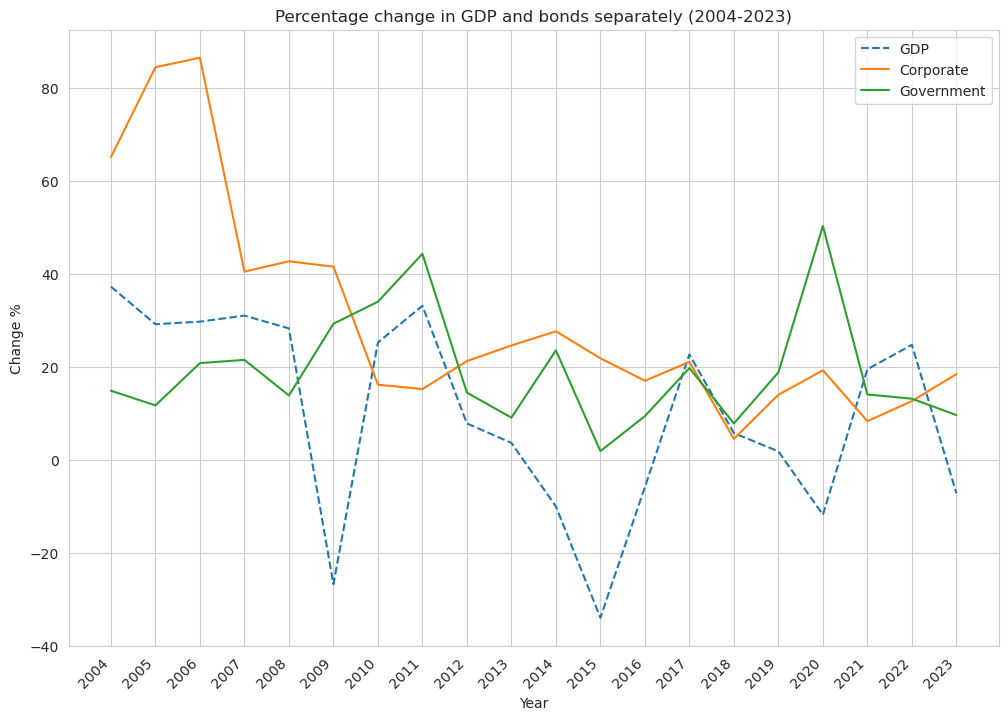

In [1001]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=indicators_gdp, x='Year', y='GDP_change', label='GDP', linestyle='--')
sns.lineplot(data=year_bonds_corp, x='year', y='volume_change', label='Corporate')
sns.lineplot(data=year_bonds_gov, x='year', y='volume_change', label='Government')

plt.title('Percentage change in GDP and bonds separately (2004-2023)')
plt.ylabel('Change %')
plt.xticks(indicators_gdp['Year'].iloc[1:], rotation=45, ha='right')
plt.show()

We can see from the graph that the changes are quite close. The percentage of change in the volume of government bonds in some years is very similar to the percentage of GDP growth (2010-2013, 2017-2018).

## Percentage change in GDP and total bonds volume

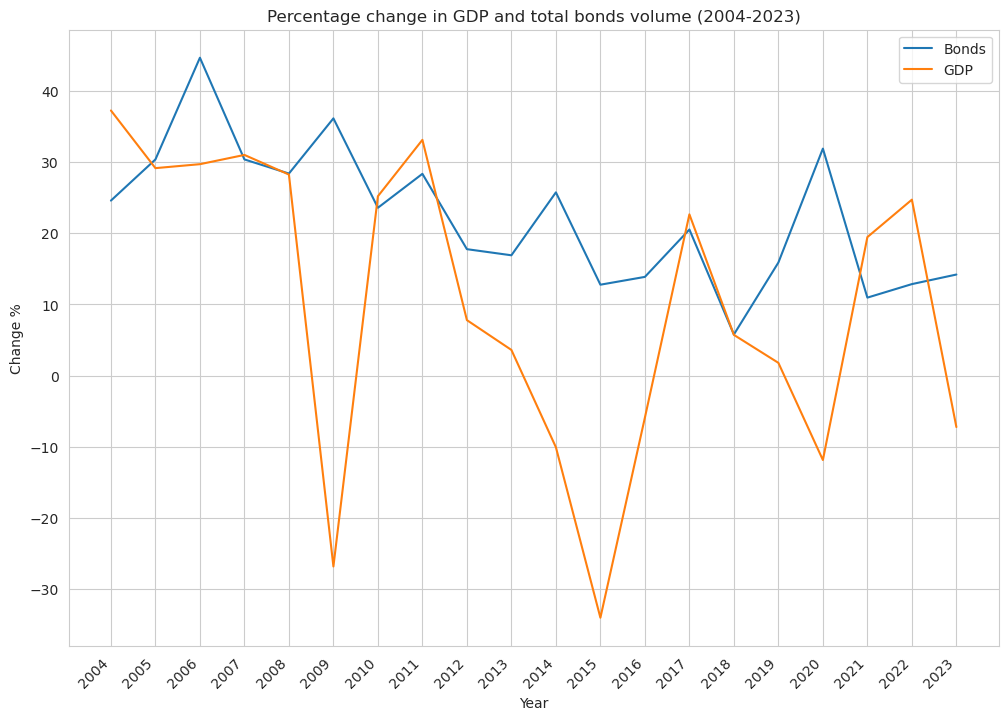

In [1002]:
bonds_summary['volume_change'] = bonds_summary['volume'].pct_change()*100

plt.figure(figsize=(12, 8))
sns.lineplot(data=bonds_summary, x='year', y='volume_change', label='Bonds')
sns.lineplot(data=indicators_gdp, x='Year', y='GDP_change', label='GDP')

plt.title('Percentage change in GDP and total bonds volume (2004-2023)')
plt.xlabel('Year')
plt.ylabel('Change %')
plt.xticks(indicators_gdp['Year'].iloc[1:], rotation=45, ha='right')
plt.show()

In general, the total volume of bonds is related to GDP. In both cases, the graphs of the curve have a downward trend

# Correlation analysis

In [1003]:
df_summary = indicators_gdp[['Year', 'Gross Domestic Product (GDP)']]
df_summary = df_summary.merge(year_bonds_corp, left_on='Year', right_on='year')\
                       .merge(year_bonds_gov, left_on='Year', right_on='year')\
                       .merge(bonds_summary, left_on='Year', right_on='year')\
                       .drop(['year_x', 'year_y', 'year', 'volume_change_x', 'volume_change_y', 'volume_change'], axis=1)\
                       .rename(columns={'volume_x': 'volume_corp', 'volume_y': 'volume_gov', 'volume': 'volume_total'})\
                       .merge(df_indicators_russia[df_indicators_russia['Year'] >= 2003][['Year', 'Per capita GNI', 'General government final consumption expenditure', 'Gross capital formation', 'Gross National Income(GNI) in USD']], how='left')
df_summary.head()

,Year,Gross Domestic Product (GDP),volume_corp,volume_gov,volume_total,Per capita GNI,General government final consumption expenditure,Gross capital formation,Gross National Income(GNI) in USD
0,2003,4.350000e+11,159.51,663.53,823.04,2903.0,7.465186e+10,9.597691e+10,4.210000e+11
1,2004,5.970000e+11,263.35,762.06,1025.41,4033.0,9.710778e+10,1.320000e+11,5.820000e+11
2,2005,7.710000e+11,485.67,851.12,1336.79,5214.0,1.250000e+11,1.640000e+11,7.500000e+11
3,2006,1.000000e+12,905.62,1028.04,1933.66,6737.0,1.670000e+11,2.240000e+11,9.660000e+11
4,2007,1.310000e+12,1272.04,1248.85,2520.89,8921.0,2.180000e+11,3.360000e+11,1.280000e+12


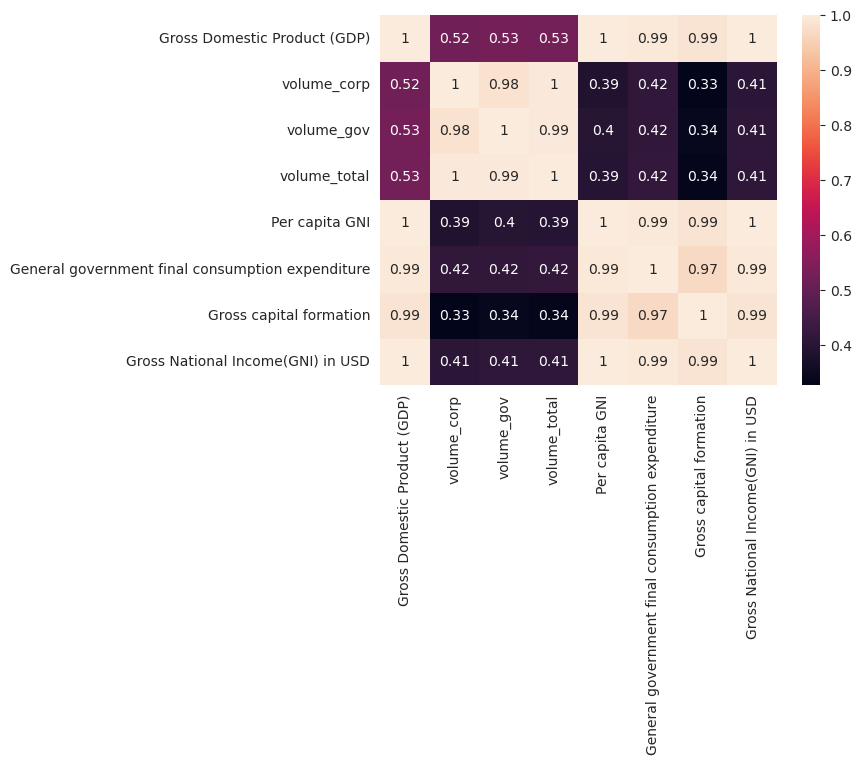

In [1004]:
sns.heatmap(df_summary.iloc[:, 1:].corr(), annot=True)

plt.show()

The correlation level of 0.52-0.53 indicates a moderate positive linear relation between GDP and bond volume. This means that when the volume of the bond market increases, GDP is likely to increase as well, but not necessarily in direct proportion. The moderate correlation at 0.52-0.53 indicates that there is some relation between the variables, but it is not very strong. In other indicators, the correlation level is small, although it is positive

## Scattering

In [1005]:
df_summary['Gross Domestic Product (GDP)'] = df_summary['Gross Domestic Product (GDP)'] / 10**12

## Scatter of GDP and corporate bonds

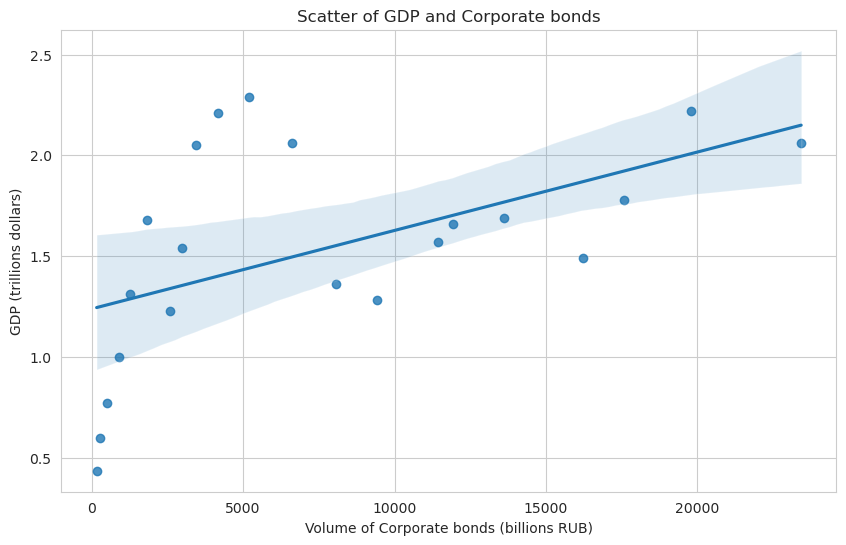

In [1006]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df_summary, x='volume_corp', y='Gross Domestic Product (GDP)')
plt.title('Scatter of GDP and Corporate bonds')
plt.xlabel('Volume of Corporate bonds (billions RUB)')
plt.ylabel('GDP (trillions dollars)')

plt.show()

## Scatter of GDP and Government bonds

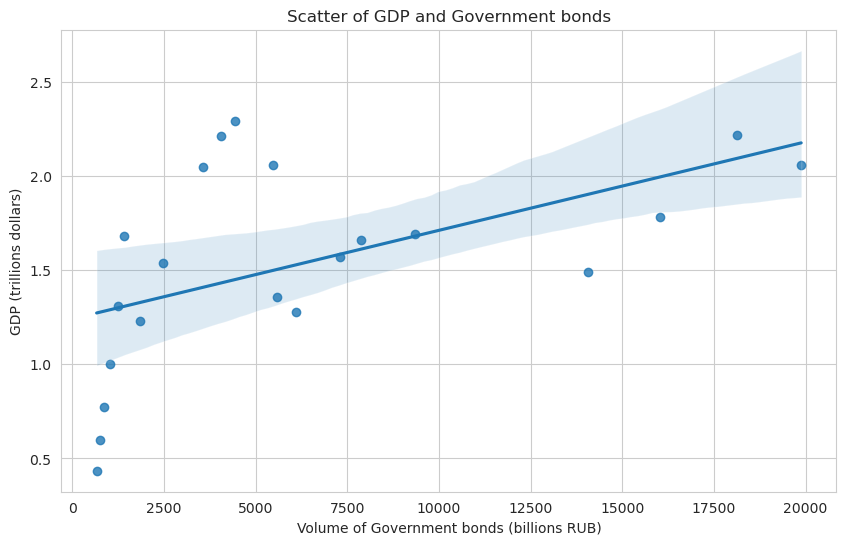

In [1007]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df_summary, x='volume_gov', y='Gross Domestic Product (GDP)')
plt.title('Scatter of GDP and Government bonds')
plt.xlabel('Volume of Government bonds (billions RUB)')
plt.ylabel('GDP (trillions dollars)')

plt.show()

# Conclusion

Based on analysing the correlation between GDP and bond volumes, it was found that there is a moderate positive linear relation with a correlation coefficient between 0.52 and 0.53. This means that an increase in bond market volume is likely to be accompanied by an increase in GDP, but not necessarily in direct proportion. A moderate correlation indicates that there is a relationship between these variables, but it is not very strong. At the same time, the correlation between GDP and other indicators was found to be insignificant despite their positive direction.


Next, scatter plots were constructed to investigate the relationship between GDP and corporate and government bond volumes. These charts also show that as the volume of bonds increases, there is an increase in GDP.


Overall, the results of the analysis indicate that there is a relation between the bond market and economic growth, but this relation is not very strong and it may be influenced by other factors. Additional research and analysis may be necessary to better understand this relationship and its long-term implications.